In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2023-01-25 22:06:44.848865: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 22:06:44.941429: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-25 22:06:44.944067: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 22:06:44.944079: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# Reading  of a data

In [2]:
df=pd.read_csv('/home/akash/Downloads/data9.txt', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0,128,248,0,0,128,0,0,128,248,...,0,248,120,128,0,248,128,0,248,NaN


In [3]:

df=df.T
df

,0
0,0.0
1,128.0
2,248.0
3,0.0
4,0.0
...,...
9996,248.0
9997,128.0
9998,0.0
9999,248.0


# Data Pre-Processing
 - Cleaning of a data

In [4]:
df.isnull()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9996,False
9997,False
9998,False
9999,False


In [5]:
df.columns = ['current_Sensor']

In [6]:
df

,current_Sensor
0,0.0
1,128.0
2,248.0
3,0.0
4,0.0
...,...
9996,248.0
9997,128.0
9998,0.0
9999,248.0


In [7]:
# Lets drop the last records as this records is NaN

df=df.replace(np.nan,0)
df.tail()

,current_Sensor
9996,248.0
9997,128.0
9998,0.0
9999,248.0
10000,0.0


In [8]:
# Lets see the datatypes of the features

df.dtypes

current_Sensor    float64
dtype: object

In [9]:
# Lets see the description of the dataset

df.describe()

,current_Sensor
count,10001.000000
mean,64.122388
std,86.355420
min,0.000000
25%,0.000000
50%,0.000000
75%,120.000000
max,248.000000


# Data Visualization

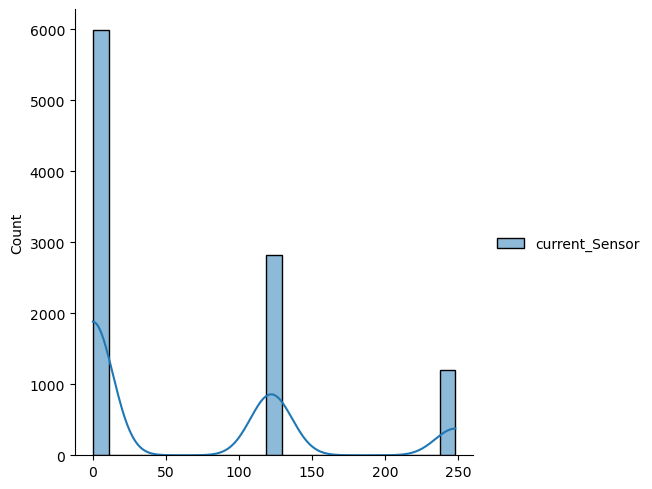

In [10]:
sns.displot(df, kde=True)

# Testing the data for Stationarity
- performing the Augmented Dicky Fuller's test

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_results = adfuller(df["current_Sensor"])

In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(current):
    result=adfuller(current)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
     


In [14]:
# Lets see what ADF test gives with our current_Sensor column
adfuller_test(df["current_Sensor"])

ADF Test Statistic : -7.838796010914718
p-value : 6.014279426374596e-12
#Lags Used : 37
Number of Observations Used : 9963
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
# Lets plot our stationary data

sns.displot(df.current_Sensor, kde=True)

# Auto Regressive Model

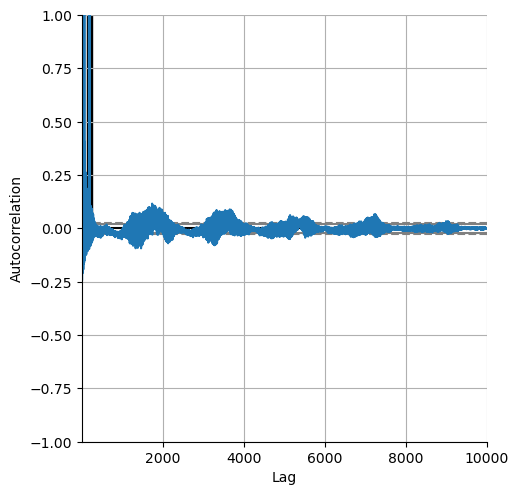

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['current_Sensor'])
plt.show()

# SARIMAX Model

In [17]:
import statsmodels.api as sm


In [18]:
model = sm.tsa.statespace.SARIMAX(df["current_Sensor"], order = (1,1,1), seasonal_order = (1,1,1,2))  # 1 is the number of shifts we did earlier
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21436D+00    |proj g|=  1.09621D-01

At iterate    5    f=  6.10635D+00    |proj g|=  6.03534D-02

At iterate   10    f=  6.07175D+00    |proj g|=  6.61468D-03

At iterate   15    f=  5.83334D+00    |proj g|=  5.67805D-02
  ys=-4.407E-02  -gs= 7.433E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     67      2     1     0   5.015D-03   5.831D+00
  F =   5.8308208568922710     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [19]:

# Forecast
df["Forecast"] = results.predict(start =9000 , end = 10000, dynamic = True)

In [20]:
# Lets Visualize
sns.displot(df['current_Sensor'], kde=True)

In [21]:
sns.displot(df['Forecast'], kde=True)

In [22]:
# Forecast values
df['Forecast']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
9996     64.402997
9997     63.794327
9998     64.403324
9999     63.794654
10000    64.403650
Name: Forecast, Length: 10001, dtype: float64

In [23]:
df.tail()

,current_Sensor,Forecast
9996,248.0,64.402997
9997,128.0,63.794327
9998,0.0,64.403324
9999,248.0,63.794654
10000,0.0,64.403650


In [24]:
df['Forecast'].to_excel("SARIMAX Output-Upspot Softech pvt ltd.xlsx", sheet_name='sheet 1')

In [25]:
df=df.drop(['Forecast'], axis=1)

# XGBoost model

In [26]:
from xgboost import plot_importance, plot_tree
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [27]:
df

,current_Sensor
0,0.0
1,128.0
2,248.0
3,0.0
4,0.0
...,...
9996,248.0
9997,128.0
9998,0.0
9999,248.0


In [28]:
# Train and test data
df_train = df[df.index < 9000]
df_test = df[df.index >= 9000]


In [29]:
X_train = df_train
y_train = df_train["current_Sensor"]

In [30]:
X_test = df_test
y_test = df_test["current_Sensor"]

In [31]:
X_test

,current_Sensor
9000,0.0
9001,0.0
9002,120.0
9003,120.0
9004,0.0
...,...
9996,248.0
9997,128.0
9998,0.0
9999,248.0


# Model Training 

In [32]:
reg = xgb.XGBRegressor(objective = "reg:squarederror", n_estimators = 1000, learning_rate=1e-3, random_state=0)
reg.fit(X_train, y_train, verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [33]:
# Prediction
yhat = reg.predict(X_test)
print(yhat)

[  0.18388163   0.18388163  76.036835   ...   0.18388163 156.90807
   0.18388163]


In [34]:
len(yhat)

1001

# XGBoost Model Evaluation

In [35]:
from xgboost import plot_importance, plot_tree
import xgboost as xgb


In [36]:

from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE: %f" %(rmse))

RMSE: 42.837484


In [37]:
y_test.values

array([  0.,   0., 120., ...,   0., 248.,   0.])

In [38]:
# Lets plot the actual vs predicted values
plt.plot(y_test.values, label = "Original")
plt.plot(yhat, label = "Predicted", color = "red")
plt.legend();

In [39]:
yhat

array([  0.18388163,   0.18388163,  76.036835  , ...,   0.18388163,
       156.90807   ,   0.18388163], dtype=float32)

In [40]:
plt.plot(y_test)
plt.plot(yhat)

In [41]:
pd.DataFrame(yhat).to_excel("XgBoost Output-Upspot Softech pvt ltd.xlsx", sheet_name='sheet 1')

# Long short-term memory (LSTM)  model

In [42]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# For defining the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# For Normalisation
from sklearn.preprocessing import MinMaxScaler  
from sklearn.metrics import mean_squared_error

In [43]:
df

,current_Sensor
0,0.0
1,128.0
2,248.0
3,0.0
4,0.0
...,...
9996,248.0
9997,128.0
9998,0.0
9999,248.0


In [44]:
#fix the random seed 
tf.random.set_seed(42)

In [45]:
df.isna().sum()

current_Sensor    0
dtype: int64

# **Normalize** the dataset using the **MinMaxScaler** preprocessing class from the scikit-learn library.

In [46]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [47]:
dataset

array([[0.        ],
       [0.51612903],
       [1.        ],
       ...,
       [0.        ],
       [1.        ],
       [0.        ]])

split the ordered dataset into **train and test datasets**. 

In [48]:
# split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

9000 1001


# defining a **function** to create a new dataset

The function takes **two arguments**: 
1. the **dataset**, which is a NumPy array you want to convert into a dataset
2. the **look_back**, which is the number of previous time steps to use as input variables to predict the next time period—in this case, defaulted to 1.

This default will create a dataset where,

**X** is the **Power at a given time (t)**, and

**Y** is the **power at the next time (t + 1)**.

In [49]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

##  function to prepare the train and test datasets for modeling.

In [50]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

**Transforming** the prepared train and test input data into the expected structure using numpy.reshape()

In [51]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## LSTM network **Model**

In [52]:
import torch

In [53]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='huber',optimizer='Adam') 
model.fit(trainX, trainY,epochs=100,batch_size=16, verbose=2)

2023-01-25 22:06:54.855246: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-25 22:06:54.855268: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-25 22:06:54.855287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akash-ASUS-TUF-Dash-F15-FX516PC-FX516PCZ): /proc/driver/nvidia/version does not exist
2023-01-25 22:06:54.855486: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
563/563 - 1s - loss: 0.0565 - 1s/epoch - 2ms/step
Epoch 2/100
563/563 - 0s - loss: 0.0543 - 498ms/epoch - 884us/step
Epoch 3/100
563/563 - 1s - loss: 0.0542 - 510ms/epoch - 907us/step
Epoch 4/100
563/563 - 0s - loss: 0.0542 - 480ms/epoch - 853us/step
Epoch 5/100
563/563 - 0s - loss: 0.0541 - 480ms/epoch - 852us/step
Epoch 6/100
563/563 - 1s - loss: 0.0542 - 521ms/epoch - 925us/step
Epoch 7/100
563/563 - 0s - loss: 0.0542 - 497ms/epoch - 882us/step
Epoch 8/100
563/563 - 0s - loss: 0.0542 - 478ms/epoch - 849us/step
Epoch 9/100
563/563 - 1s - loss: 0.0541 - 505ms/epoch - 897us/step
Epoch 10/100
563/563 - 1s - loss: 0.0541 - 616ms/epoch - 1ms/step
Epoch 11/100
563/563 - 1s - loss: 0.0541 - 502ms/epoch - 892us/step
Epoch 12/100
563/563 - 0s - loss: 0.0541 - 438ms/epoch - 779us/step
Epoch 13/100
563/563 - 0s - loss: 0.0541 - 442ms/epoch - 784us/step
Epoch 14/100
563/563 - 0s - loss: 0.0541 - 453ms/epoch - 805us/step
Epoch 15/100
563/563 - 1s - loss: 0.0541 - 547ms/epoch - 972us/s

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [55]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

32/32 [==============================] - 0s 534us/step


In [56]:
trainPredict

array([[0.18245253],
       [0.2912714 ],
       [0.52590024],
       ...,
       [0.18245253],
       [0.18245253],
       [0.18245253]], dtype=float32)

In [57]:
# plt.plot(trainPredict)
sns.displot(trainPredict, kde=True)

In [58]:
testPredict

array([[0.18245253],
       [0.18245253],
       [0.28008008],
       [0.28008008],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.28008008],
       [0.28008008],
       [0.28008008],
       [0.28008008],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.28008008],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.28008008],
       [0.28008008],
       [0.28008008],
       [0.2912714 ],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.18245253],
       [0.28008008],
       [0.28008008],
       [0.280

In [59]:
# plt.plot(testPredict)
sns.displot(testPredict, kde=True)

In [60]:
y_prediction_future= scaler.inverse_transform(testPredict)[:,0]

In [61]:
y_prediction_future

array([ 45.248226,  45.248226,  69.45986 ,  69.45986 ,  45.248226,
        45.248226,  45.248226,  45.248226,  45.248226,  45.248226,
        69.45986 ,  69.45986 ,  69.45986 ,  69.45986 ,  45.248226,
        45.248226,  45.248226,  45.248226,  45.248226,  45.248226,
        45.248226,  69.45986 ,  45.248226,  45.248226,  45.248226,
        45.248226,  45.248226,  45.248226,  45.248226,  45.248226,
        45.248226,  45.248226,  45.248226,  45.248226,  45.248226,
        69.45986 ,  69.45986 ,  69.45986 ,  72.235306,  45.248226,
        45.248226,  45.248226,  45.248226,  45.248226,  45.248226,
        69.45986 ,  69.45986 ,  69.45986 ,  72.235306,  45.248226,
        45.248226,  45.248226,  45.248226,  45.248226,  45.248226,
        45.248226,  72.235306,  72.235306,  72.235306,  69.45986 ,
        45.248226,  45.248226,  45.248226,  45.248226,  45.248226,
        45.248226,  72.235306,  69.45986 ,  69.45986 ,  69.45986 ,
        45.248226,  45.248226,  45.248226,  45.248226,  45.248

In [62]:
pd.DataFrame(y_prediction_future).to_excel('LSTM Output-Upspot Softech pvt ltd.xlsx', sheet_name='sheet1', index=False)

# Conclusion 



#### I tried testing two machine learning model and one Deep learning model 
1. SARIMAX
2. XGBoost 
3. LSTM 

#### input file - data9.txt

##### Output of predictions are saved in .xlsx format from respective model 